# Buissnes Objective
                         
                         The Document classification Solution Should Significanly Reduce The Mannual Human Effort IN HRM. IT should achieve a higher level of accuracy and automation with minimal human intervison

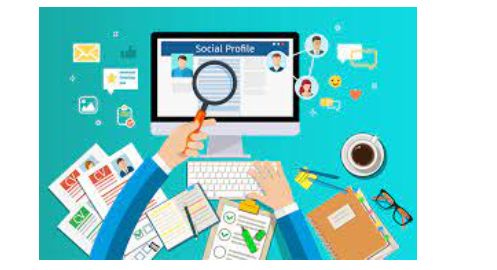

In [1]:
from PIL  import Image
img = Image.open('photo1.PNG')
img

# DATA


In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("Resume_new.csv")           #load the data

In [4]:
df

,Resumes,Category
0,kamalakar reddy linked www linkedin com kamala...,React JS Developer Resume
1,thirupathamma balla summary year experience re...,React JS Developer Resume
2,mareedu lokesh babu professional overview arou...,React JS Developer Resume
3,ui developer react js developer name krishna p...,React JS Developer Resume
4,name ravali p curriculum vitae specialization ...,React JS Developer Resume
...,...,...
74,hari krishna summary result oriented professio...,Workday Resume
75,madeeswar profile summary around years experie...,Workday Resume
76,pic pic years experience workday hcm technical...,Workday Resume
77,name gopi krishna reddy professional summery w...,Workday Resume


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Resumes   79 non-null     object
 1   Category  79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


# EDA

# Handling Missing Values and Duplicates

In [6]:
import missingno as msno

<AxesSubplot:>

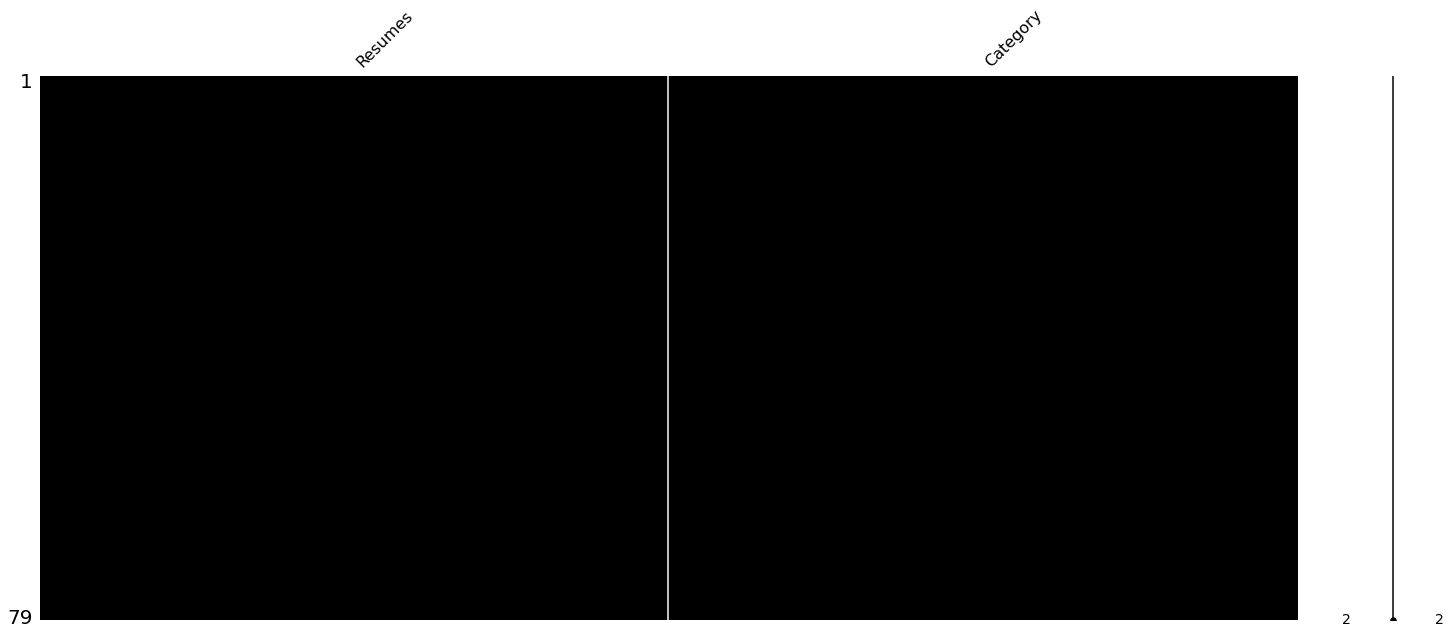

In [7]:
msno.matrix(df, color=(0, 0, 0))

* There Are No Null Values

In [8]:
df[df.duplicated()]                      #there are two duplicates 

,Resumes,Category
12,ui developer react js developer name krishna p...,React JS Developer Resume
20,mareedu lokesh babu professional overview arou...,React JS Developer Resume


In [9]:
# drop the duplicates
df = df.drop_duplicates()

In [10]:
df[df.duplicated()]   

,Resumes,Category


* There Are No Duplicates

In [11]:
# stats of data
df.describe()

,Resumes,Category
count,77,77
unique,77,4
top,kamalakar reddy linked www linkedin com kamala...,React JS Developer Resume
freq,1,22


In [12]:
# Displaying the categoris
print("Displaying the distinct categories of resume:\n\n ")
print(df['Category'].unique())

Displaying the distinct categories of resume:

 
['React JS Developer Resume' 'PeopleSoft Resume'
 'SQL Developer Lightning Insight Resume' 'Workday Resume']


In [13]:
# displaying the categoris of resume
print("Displaying the distinct categories of resume and the number of records belonging to each category:\n\n")
print(df['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category:


React JS Developer Resume                 22
Workday Resume                            21
PeopleSoft Resume                         20
SQL Developer Lightning Insight Resume    14
Name: Category, dtype: int64


# Visuvalization

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

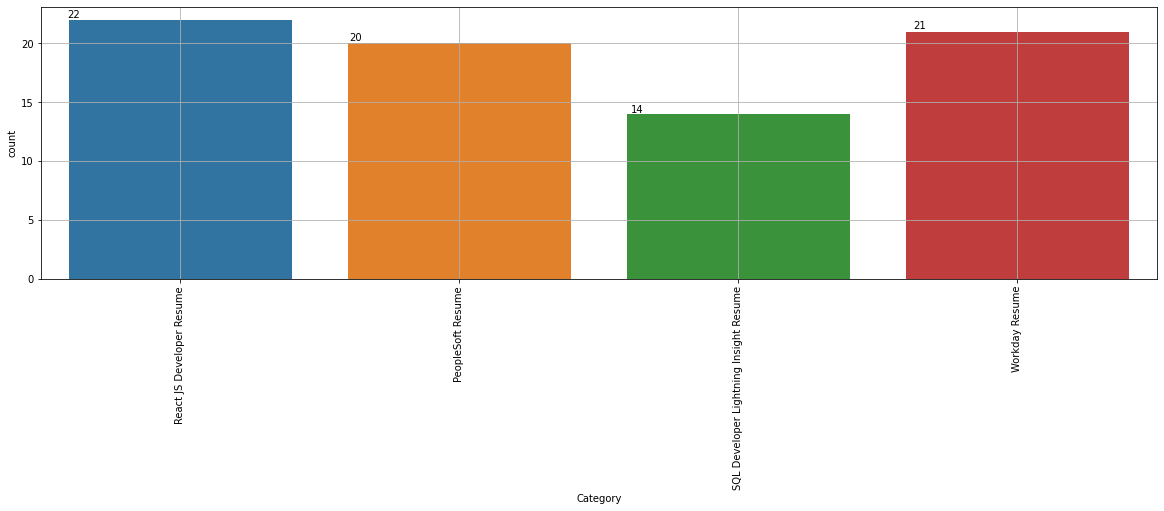

In [15]:
import seaborn as sns
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()


<AxesSubplot:>

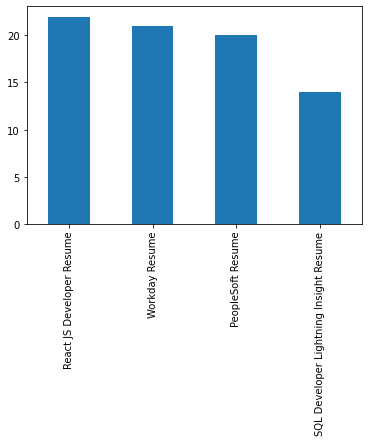

In [16]:
#Visualization of various categories
df['Category'].value_counts(sort=True).nlargest(25).plot.bar()

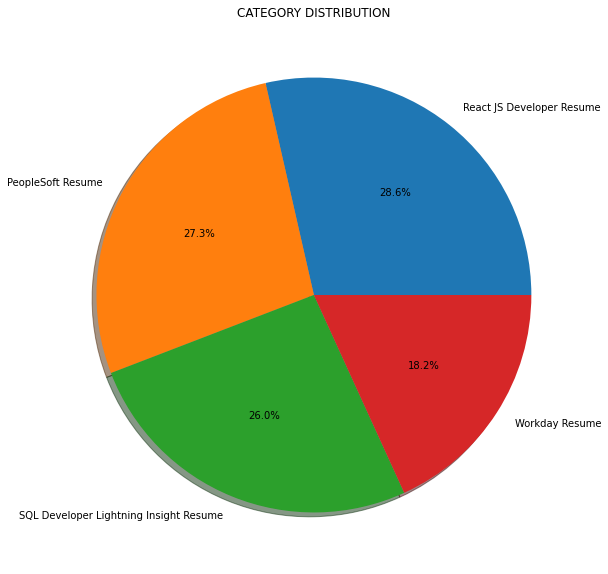

In [17]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels  = df['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()



# Text Preprocessing

In [18]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [19]:
df['cleaned_resume'] = df.Resumes.apply(lambda x: cleanResume(x))

In [20]:
df.head()

,Resumes,Category,cleaned_resume
0,kamalakar reddy linked www linkedin com kamala...,React JS Developer Resume,kamalakar reddy linked www linkedin com kamala...
1,thirupathamma balla summary year experience re...,React JS Developer Resume,thirupathamma balla summary year experience re...
2,mareedu lokesh babu professional overview arou...,React JS Developer Resume,mareedu lokesh babu professional overview arou...
3,ui developer react js developer name krishna p...,React JS Developer Resume,ui developer react js developer name krishna p...
4,name ravali p curriculum vitae specialization ...,React JS Developer Resume,name ravali p curriculum vitae specialization ...


In [21]:
df_new = df.drop('Resumes',axis=1)

In [22]:
df_new 

,Category,cleaned_resume
0,React JS Developer Resume,kamalakar reddy linked www linkedin com kamala...
1,React JS Developer Resume,thirupathamma balla summary year experience re...
2,React JS Developer Resume,mareedu lokesh babu professional overview arou...
3,React JS Developer Resume,ui developer react js developer name krishna p...
4,React JS Developer Resume,name ravali p curriculum vitae specialization ...
...,...,...
74,Workday Resume,hari krishna summary result oriented professio...
75,Workday Resume,madeeswar profile summary around years experie...
76,Workday Resume,pic pic years experience workday hcm technical...
77,Workday Resume,name gopi krishna reddy professional summery w...


In [23]:
import nltk                                             # natural language tokenization
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df_new['cleaned_resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 587), ('peoplesoft', 453), ('workday', 431), ('application', 412), ('using', 381), ('server', 360), ('data', 330), ('reports', 326), ('project', 320), ('sql', 280), ('business', 271), ('database', 241), ('web', 240), ('process', 236), ('worked', 216), ('knowledge', 213), ('client', 195), ('tools', 189), ('involved', 189), ('integrations', 189), ('system', 188), ('integration', 182), ('hcm', 182), ('like', 178), ('support', 178), ('good', 167), ('skills', 167), ('creating', 163), ('development', 162), ('people', 160), ('team', 159), ('technical', 158), ('working', 158), ('services', 156), ('report', 155), ('servers', 151), ('design', 150), ('created', 150), ('testing', 149), ('various', 144), ('oracle', 143), ('role', 140), ('management', 136), ('environment', 136), ('security', 134), ('eib', 134), ('responsibilities', 133), ('production', 133), ('issues', 130), ('developer', 128)]


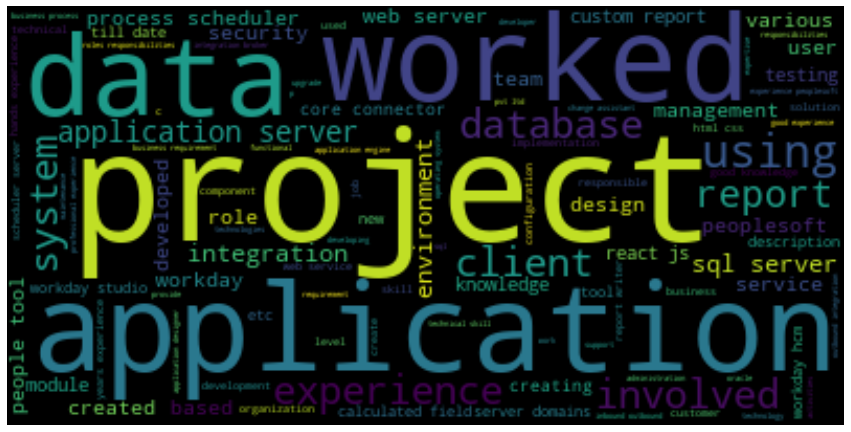

In [24]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


# Label Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df_new["Category_N"] = labelencoder.fit_transform(df_new["Category"])
# print(type(labels))

df_new.tail()

,Category,cleaned_resume,Category_N
74,Workday Resume,hari krishna summary result oriented professio...,3
75,Workday Resume,madeeswar profile summary around years experie...,3
76,Workday Resume,pic pic years experience workday hcm technical...,3
77,Workday Resume,name gopi krishna reddy professional summery w...,3
78,Workday Resume,shireesh balasani hcm consultant profile summa...,3


In [26]:
df_new.head()

,Category,cleaned_resume,Category_N
0,React JS Developer Resume,kamalakar reddy linked www linkedin com kamala...,1
1,React JS Developer Resume,thirupathamma balla summary year experience re...,1
2,React JS Developer Resume,mareedu lokesh babu professional overview arou...,1
3,React JS Developer Resume,ui developer react js developer name krishna p...,1
4,React JS Developer Resume,name ravali p curriculum vitae specialization ...,1


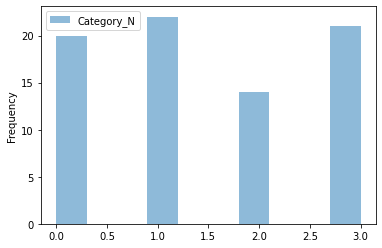

In [27]:
df_new.plot.hist(alpha=0.5);

<AxesSubplot:>

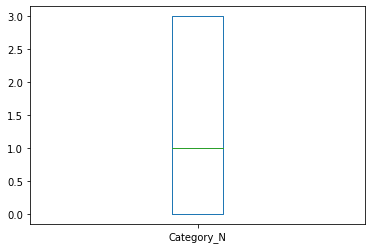

In [28]:
df_new['Category_N'].plot.box()                    #box plot

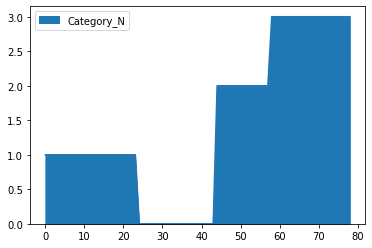

In [29]:
df_new.plot.area();             #Area Plot


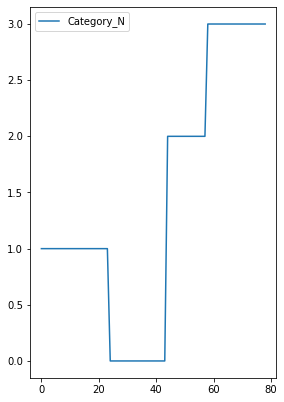

In [30]:
df_new.plot(subplots=True, layout=(2, 3), figsize=(15, 15), sharex=False);

In [31]:
def wordfreq(df):
    count = df_new['Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import   TfidfVectorizer  #Term Frequency Inverse Document Frequency.

In [33]:
Text = df_new['cleaned_resume'].values


In [34]:
op_labels = df_new['Category_N'].values
word_vectorizer = TfidfVectorizer(max_features = 1500)
word_vectorizer.fit(Text)
features = word_vectorizer.transform(Text)

In [35]:
word_vectorizer.get_feature_names()

['abilities',
 'ability',
 'absence',
 'academic',
 'achieve',
 'achievement',
 'achievements',
 'across',
 'active',
 'activities',
 'activity',
 'add',
 'added',
 'adding',
 'additional',
 'addm',
 'address',
 'admin',
 'administer',
 'administration',
 'administrator',
 'adp',
 'advance',
 'advanced',
 'ae',
 'aetna',
 'affiliated',
 'ag',
 'agent',
 'aggregate',
 'agile',
 'aid',
 'aig',
 'aix',
 'alerts',
 'allowance',
 'alone',
 'along',
 'also',
 'alter',
 'alteraudit',
 'american',
 'analysis',
 'analyst',
 'analytical',
 'analytics',
 'analyze',
 'analyzed',
 'analyzing',
 'andhra',
 'android',
 'angular',
 'another',
 'ansible',
 'ap',
 'api',
 'app',
 'application',
 'applications',
 'applied',
 'apply',
 'applying',
 'approach',
 'appropriate',
 'approval',
 'apps',
 'apr',
 'april',
 'ar',
 'architecture',
 'area',
 'areas',
 'around',
 'assign',
 'assigning',
 'assignments',
 'assist',
 'assistant',
 'associate',
 'athena',
 'attached',
 'attitude',
 'attributes',
 'audio

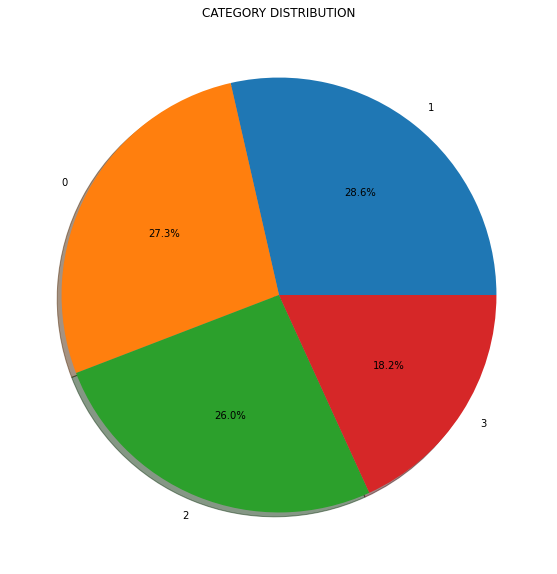

In [36]:
from matplotlib.gridspec import GridSpec
targetCounts = df_new['Category_N'].value_counts()
targetLabels  = df_new['Category_N'].unique()
# Make square figures and axes
plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

# Model Building

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,op_labels,random_state=0, test_size=0.2)

In [38]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

# 1. Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [41]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [42]:
y_pred = lr.predict(X_test)

In [43]:
confusion_matrix(y_test,y_pred)

array([[4, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 1, 4, 0],
       [0, 0, 0, 5]], dtype=int64)

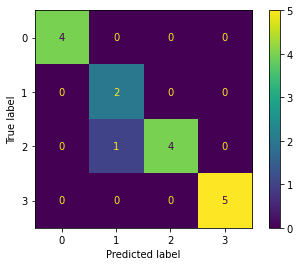

In [44]:
plot_confusion_matrix(lr
                      , X_test, y_test)  
plt.show()


In [45]:
print(accuracy_score(y_test,y_pred))

0.9375


In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.67      1.00      0.80         2
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         5

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.92        16
weighted avg       0.96      0.94      0.94        16



# 2. knn

In [47]:
from sklearn.neighbors import KNeighborsClassifier

In [48]:
knn = KNeighborsClassifier(n_neighbors=2)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [50]:
y_predit = knn.predict(X_test)

In [51]:
confusion_matrix(y_test,y_predit)

array([[4, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 5]], dtype=int64)

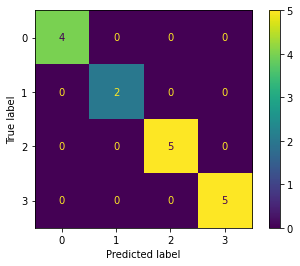

In [52]:
plot_confusion_matrix(knn
                      , X_test, y_test)  
plt.show()

In [53]:
print(accuracy_score(y_test,y_pred))

0.9375


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.67      1.00      0.80         2
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         5

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.92        16
weighted avg       0.96      0.94      0.94        16



# 3.SVM

In [55]:
from sklearn.svm import SVC

In [56]:
svc_classifier = SVC(kernel='rbf',random_state = 42)
svc_classifier.fit(X_train,y_train)

SVC(random_state=42)

In [57]:
y_pred = svc_classifier.predict(X_test)

In [58]:
confusion_matrix(y_test,y_pred)

array([[4, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 1, 4, 0],
       [0, 0, 0, 5]], dtype=int64)

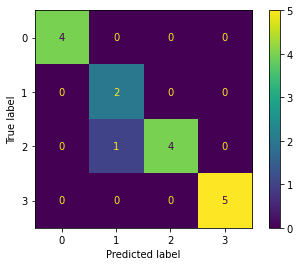

In [59]:
plot_confusion_matrix(svc_classifier
                      , X_test, y_test)  
plt.show()

In [60]:
print(accuracy_score(y_test,y_pred))

0.9375


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.67      1.00      0.80         2
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         5

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.92        16
weighted avg       0.96      0.94      0.94        16



# 4. Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [64]:
y_pred = random_forest.predict(X_test)

In [65]:
confusion_matrix(y_test,y_pred)

array([[4, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 2, 3, 0],
       [0, 0, 0, 5]], dtype=int64)

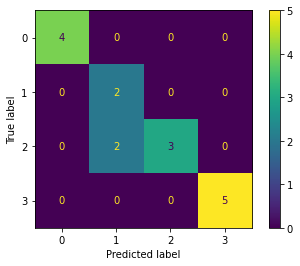

In [66]:
plot_confusion_matrix(random_forest
                      , X_test, y_test)  
plt.show()

In [67]:
print(accuracy_score(y_test,y_pred))

0.875


In [68]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.50      1.00      0.67         2
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         5

    accuracy                           0.88        16
   macro avg       0.88      0.90      0.85        16
weighted avg       0.94      0.88      0.88        16



# 5. Decision Tree

In [69]:
 from sklearn.tree import DecisionTreeClassifier

In [70]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
y_pred = decision_tree.predict(X_test)

In [72]:
confusion_matrix(y_test,y_pred)

array([[4, 0, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 4, 0],
       [1, 0, 0, 4]], dtype=int64)

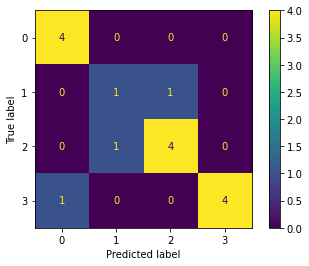

In [73]:
plot_confusion_matrix(decision_tree
                      , X_test, y_test)  
plt.show()

In [74]:
print(accuracy_score(y_test,y_pred))

0.8125


In [75]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.50      0.50      0.50         2
           2       0.80      0.80      0.80         5
           3       1.00      0.80      0.89         5

    accuracy                           0.81        16
   macro avg       0.78      0.77      0.77        16
weighted avg       0.82      0.81      0.81        16



* As We Seen Above Decision Tree And Knn Model Performing 100% ACCURACY
